In [78]:
#import necessary tools to complete analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [79]:
#Entering the data

sm_questions = pd.read_csv('Data/questions.csv')
sm_answers = pd.read_csv('Data/answers.csv')
sm_survey_year = pd.read_csv('Data/survey.csv')


In [80]:
# Merge csv and question ids
survey_data = pd.merge(sm_questions, sm_answers, left_on = "questionid", right_on = "QuestionID")
survey_data.head()

# List of question IDs need to facilitate analysis
question_id = [1, 2, 3, 4, 33, 11, 56, 31]

new_df = survey_data[survey_data["QuestionID"].isin(question_id)]

new_df = new_df.rename(columns = {"questiontext": "Questions", "AnswerText": "Answers", "SurveyID": "Year"})

new_df.head()

,Unnamed: 0_x,Questions,questionid,Unnamed: 0_y,Answers,Year,UserID,QuestionID
0,0,What is your age?,1,0,37,2014,1,1
1,0,What is your age?,1,1,44,2014,2,1
2,0,What is your age?,1,2,32,2014,3,1
3,0,What is your age?,1,3,31,2014,4,1
4,0,What is your age?,1,4,31,2014,5,1


In [97]:
# Move the questions to columns

column_df = new_df.pivot(index = "UserID", columns = "Questions", values = "Answers")

# Questions

column_df = column_df[["What is your age?", "What is your gender?", "What country do you live in?", "If you live in the United States, which state or territory do you live in?",
                       "Do you currently have a mental health disorder?",
                       "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?", 
                       "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?", 
                       "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"]]

# Renaming Columns

column_df_2 = column_df.rename(columns = {"What is your age?": "Age", "What is your gender?": "Gender", "What country do you live in?": "Country", 
                                          "If you live in the United States, which state or territory do you live in?": "State",  
                                        "Do you currently have a mental health disorder?": "Current Mental Health Disorder",
                                        "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?": "Currently Anonymous", 
                                        "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?": "Previous Experiences", 
                                        "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?": "Liklihood of Reveal"})


column_df_2

Questions,Age,Gender,Country,State,Current Mental Health Disorder,Anonymous?,Currently Anonymous,Previous Experiences,Liklihood of Reveal
UserID,,,,,,,,,
1,37,Female,United States,Illinois,NaN,NaN,Yes,NaN,NaN
2,44,Male,United States,Indiana,NaN,NaN,Don't know,NaN,NaN
3,32,Male,Canada,-1,NaN,NaN,Don't know,NaN,NaN
4,31,Male,United Kingdom,-1,NaN,NaN,No,NaN,NaN
5,31,Male,United States,Texas,NaN,NaN,Don't know,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4214,27,male,India,-1,Possibly,I don't know,I don't know,"Yes, I observed",Maybe
4215,48,Male,United States of America,Louisiana,No,I don't know,-1,"Yes, I observed",-1
4216,50,Male,India,-1,No,-1,-1,I've always been self-employed,-1


1) Look in column to make sure answers are standardized 
    Check and see if you need either remove or change a record to make sure they are all the same 
2) Keep only questions we need for our analysis 
3) Merge it with answer csv
        Try to get questions as columns and answer as rows for each survey taker
4) check for duplicates and missing values 
5) Check column names. 
        Captialize words 
6) 
        

In [87]:
sm_prev_answers = ["Yes, I experienced", "Yes, I observed", "No"]
sm_prev_experiences = column_df_2[column_df_2["Previous Experiences"].isin(sm_prev_answers)]
sm_prev_experiences = sm_prev_experiences["Previous Experiences"]
sm_prev_count = sm_prev_experiences.value_counts()
sm_prev_count

No                    1207
Yes, I observed        541
Yes, I experienced     356
Name: Previous Experiences, dtype: int64

Text(0.5, 1.0, 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?')

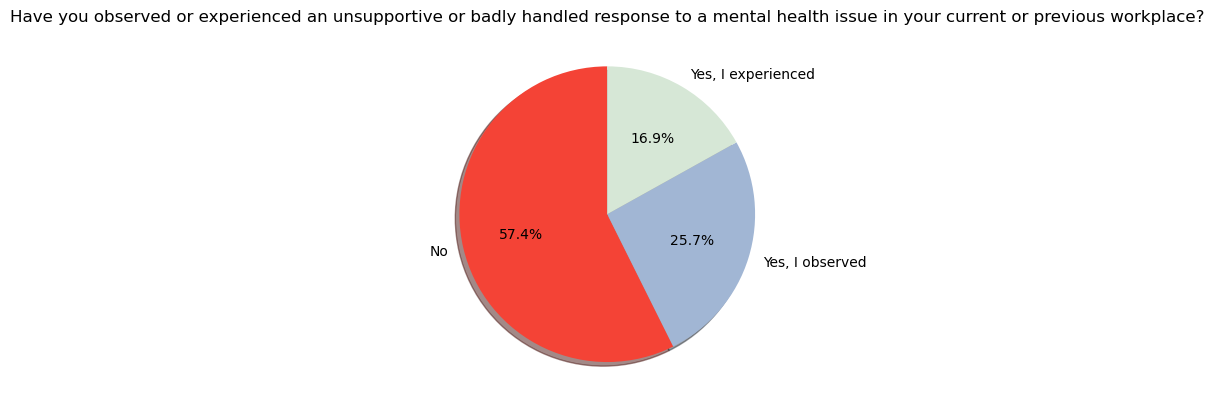

In [88]:
sm_prev_answers = ["No", "Yes, I observed", "Yes, I experienced"]
sm_freq_colors2 = ['#f44336', '#a1b6d4', '#d6e7d6']
fig1, ax1 = plt.subplots()
ax1.pie(sm_prev_count, labels=sm_prev_answers, colors=sm_freq_colors2, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?")

In [89]:
sm_reveal_answers = ["Yes", "No", "Maybe"]
sm_reveal = column_df_2[column_df_2["Liklihood of Reveal"].isin(sm_reveal_answers)]
sm_reveal = sm_reveal["Liklihood of Reveal"]
sm_reveal_count = sm_reveal.value_counts()
sm_reveal_count

No       968
Yes      482
Maybe    405
Name: Liklihood of Reveal, dtype: int64

Text(0.5, 1.0, 'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?')

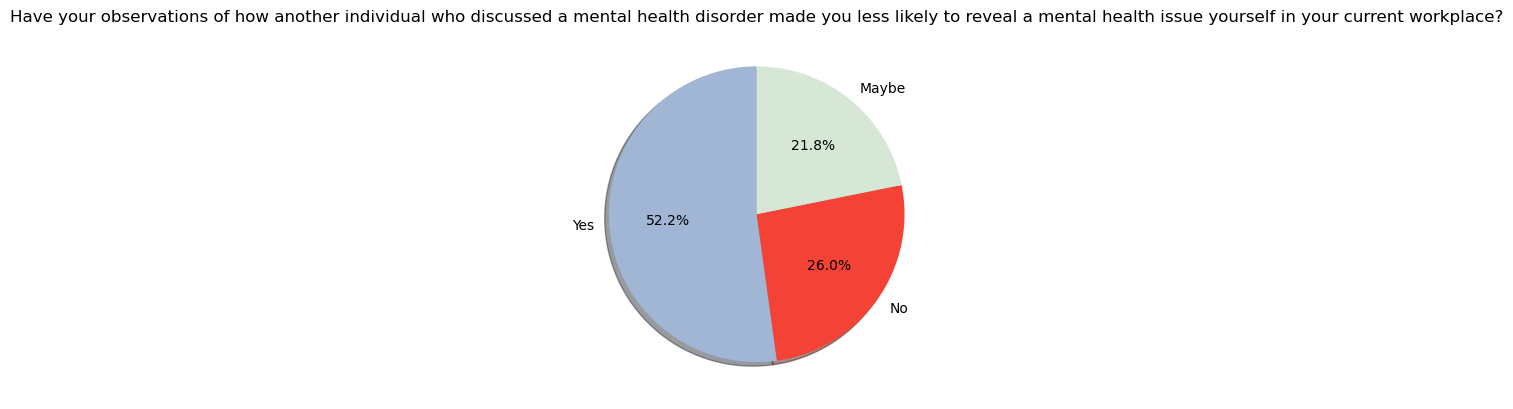

In [90]:
sm_reveal_answers = ["Yes", "No", "Maybe"]
sm_freq_colors2 = ['#a1b6d4', '#f44336', '#d6e7d6']
fig1, ax1 = plt.subplots()
ax1.pie(sm_reveal_count, labels=sm_reveal_answers, colors=sm_freq_colors2, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?")

In [91]:
sm_freq_answers = ["I don't know", "Yes", "No"]
anonymous_status_freq = column_df_2[column_df_2["Currently Anonymous"].isin(sm_freq_answers)]
anonymous_status_freq = anonymous_status_freq["Currently Anonymous"]
anonymous_status_counts = anonymous_status_freq.value_counts()
anonymous_status_counts

I don't know    1546
Yes             1135
No               213
Name: Currently Anonymous, dtype: int64

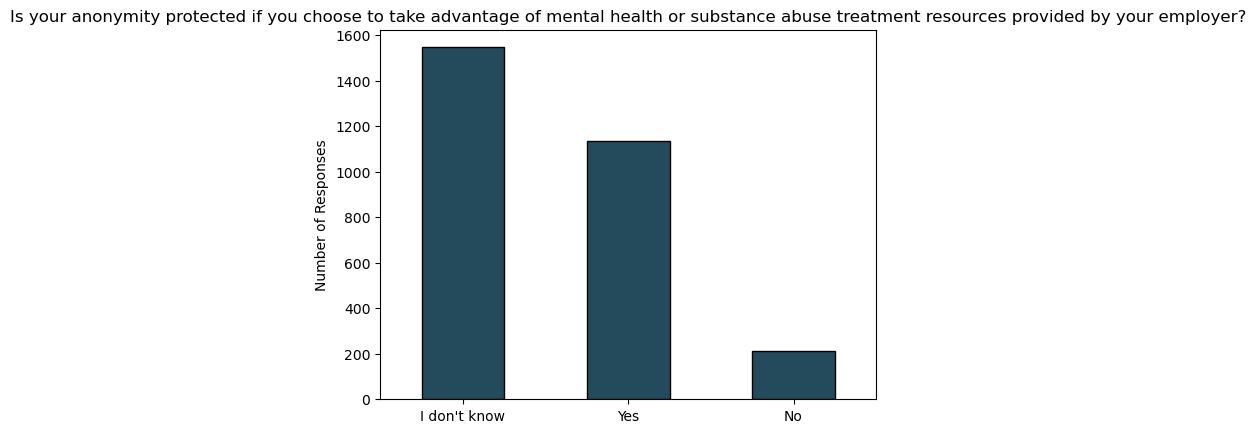

In [92]:
anonymous_status_counts.plot(kind='bar', rot=0, facecolor="#244b5c", edgecolor = "black")
# Label some things
plt.title("Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?")
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.show()

The vast majority of those surveyed do not know if their information was kept anonymous if they chose to utilize treatment resources from their previous employer. This is very alarming and indicates that companies need to be providing more information to their employees about how their information as it relates to mental health conditions. Of those who gave a definitive "Yes" or "No" the majority answering "Yes" indicates that those who typically seek out help and know their company's policy have their data protected. The "No"s are concerning given that that 